In [1]:
#import liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
#loding dataset 
df = pd.read_csv("C:/Users/lenovo/Downloads/Fraud_check (1).csv")

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [7]:
df.shape

(600, 6)

In [8]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
df["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [10]:
fraudcheck = df.drop(columns=["Taxable.Income"])
fraudcheck

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [11]:
FC = pd.get_dummies(fraudcheck .drop(columns = ["TaxInc"]))

In [12]:
Fraud_final = pd.concat([FC,fraudcheck ["TaxInc"]], axis = 1)

In [13]:
colnames = list(Fraud_final.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

In [14]:
predictors = colnames[:9]
predictors

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [15]:
target = colnames[9]
target

'TaxInc'

In [16]:
X = Fraud_final[predictors]
X.shape

(600, 9)

In [17]:
Y = Fraud_final[target]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [18]:
# Visualization

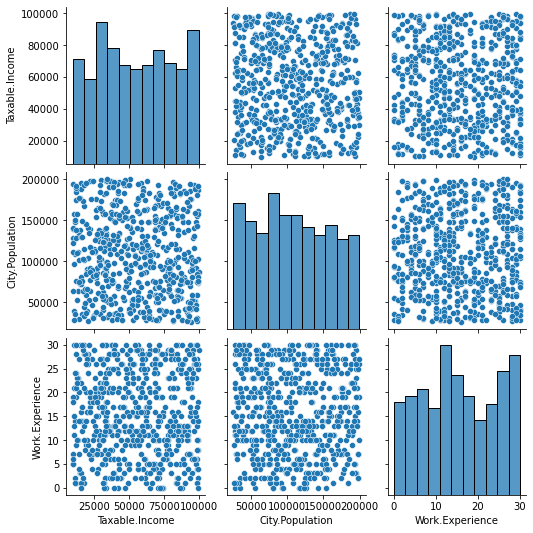

In [19]:
sns.pairplot(df)

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

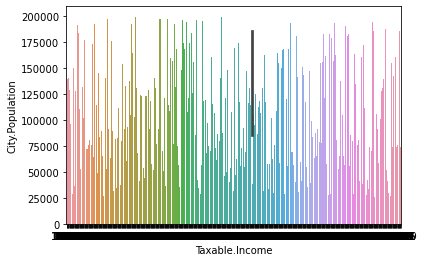

In [20]:
sns.barplot(df['Taxable.Income'], df['City.Population'])

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

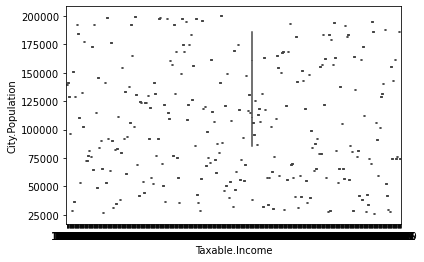

In [21]:
sns.boxplot(df['Taxable.Income'], df['City.Population'])

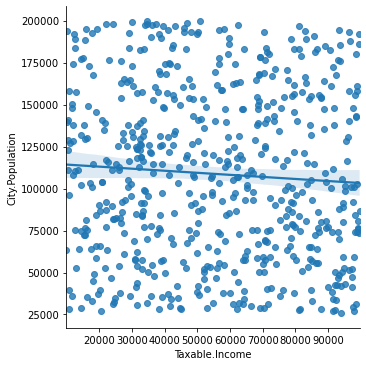

In [22]:
sns.lmplot(x='Taxable.Income',y='City.Population', data=df)

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


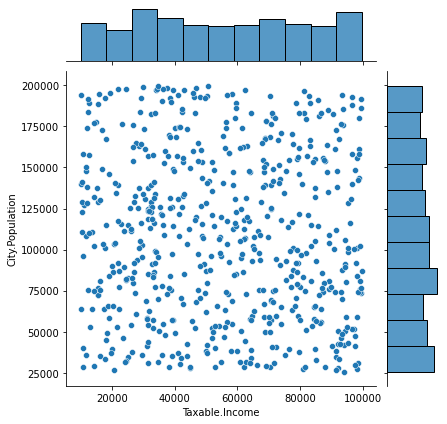

In [23]:
sns.jointplot(df['Taxable.Income'], df['City.Population'])

C:\Excel R\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income', ylabel='City.Population'>

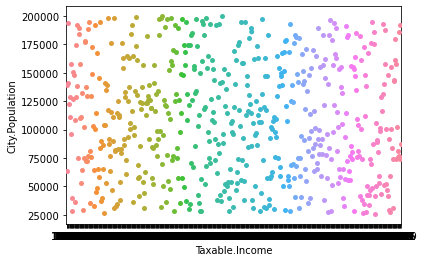

In [24]:
sns.stripplot(df['Taxable.Income'], df['City.Population'])

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Taxable.Income', ylabel='Density'>

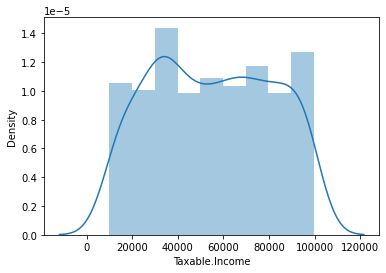

In [25]:
sns.distplot(df['Taxable.Income'])

C:\Excel R\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

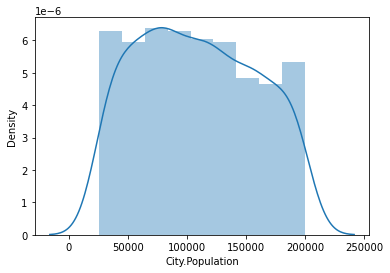

In [26]:
sns.distplot(df['City.Population'])

In [27]:
# Building Random Forest Mode

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rf = RandomForestClassifier(n_jobs = 3, oob_score = True, n_estimators = 15, criterion = "entropy")

In [30]:
rf = RandomForestClassifier(n_jobs=3,oob_score=True,n_estimators=15,criterion="entropy")

In [31]:
np.shape(Fraud_final)

(600, 10)

In [32]:
Fraud_final.describe()

,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,0.480000,0.520000,0.315000,0.323333,0.361667,0.496667,0.503333
std,49850.075134,8.842147,0.500017,0.500017,0.464903,0.468139,0.480884,0.500406,0.500406
min,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,66966.750000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,106493.500000,15.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,150114.250000,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
Fraud_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   City.Population          600 non-null    int64   
 1   Work.Experience          600 non-null    int64   
 2   Undergrad_NO             600 non-null    uint8   
 3   Undergrad_YES            600 non-null    uint8   
 4   Marital.Status_Divorced  600 non-null    uint8   
 5   Marital.Status_Married   600 non-null    uint8   
 6   Marital.Status_Single    600 non-null    uint8   
 7   Urban_NO                 600 non-null    uint8   
 8   Urban_YES                600 non-null    uint8   
 9   TaxInc                   600 non-null    category
dtypes: category(1), int64(2), uint8(7)
memory usage: 14.3 KB


In [34]:
type([X])

list

In [35]:
type([Y])

list

In [36]:
Y1 = pd.DataFrame(Y)
Y1

,TaxInc
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [37]:
type(Y1)

pandas.core.frame.DataFrame

In [38]:
rf.fit(X,Y1)

<ipython-input-38-76d304e49a31>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X,Y1)


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [39]:
rf.estimators_ 

[DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=284757995),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=548485479),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=643668296),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1755353597),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1729508450),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=506375337),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=1625176517),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
                        random_state=821480379),
 DecisionTreeClassifier(criterion='entropy', max_features='auto',
           

In [40]:
rf.classes_ 

array(['Good', 'Risky'], dtype=object)

In [41]:
rf.n_classes_

2

In [42]:
rf.n_features_

C:\Excel R\anaconda\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


9

In [43]:
rf.n_outputs_

1

In [44]:
rf.oob_score_

0.72

In [45]:
rf.predict(X)

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',

In [46]:
Fraud_final['rf_pred'] = rf.predict(X)

In [47]:
cols = ['rf_pred','TaxInc']

In [48]:
Fraud_final[cols].head()

,rf_pred,TaxInc
0,Good,Good
1,Good,Good
2,Good,Good
3,Good,Good
4,Good,Good


In [49]:
Fraud_final["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(Fraud_final['TaxInc'],Fraud_final['rf_pred']) # Confusion matrix

array([[476,   0],
       [ 12, 112]], dtype=int64)

In [52]:
pd.crosstab(Fraud_final['TaxInc'],Fraud_final['rf_pred'])

rf_pred,Good,Risky
TaxInc,,
Risky,12,112
Good,476,0


In [53]:
print("Accuracy",(476+115)/(476+115+9+0)*100)

Accuracy 98.5


In [54]:
Fraud_final["rf_pred"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: rf_pred, Length: 600, dtype: object